In [69]:
# Create a bubble chart that showcases the average fare versus the total number of rides
#with bubble size based on the total number ofdrivers for each city type, including urban, 
#suburban, and rural.

# Determine the mean, median, and mode for the following:
# The total number of rides for each city type.
# The average fares for each city type.
# The total number of drivers for each city type.
# Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
# The number of rides for each city type.
# The fares for each city type.
# The number of drivers for each city type.
# Create a pie chart that visualizes each of the following data for each city type:
# The percent of total fares.
# The percent of total rides.
# The percent of total drivers.

In [70]:
%matplotlib inline

In [71]:
# import dependency
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [72]:
# import ride data in Pandas as a DF
ride_data_df = pd.read_csv('resources/ride_data.csv')
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [73]:
# import city data in pd as a df
city_data_df = pd.read_csv('resources/city_data.csv')
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [74]:
# INSPECT THE CITY DATA
# get col and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [75]:
# get col and rows that are null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [76]:
# get the data type of each col
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [77]:
# get unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [78]:
# get the number of data points from the urban cities
urban = sum(city_data_df['type'] == 'Urban')
suburban = sum(city_data_df['type'] == 'Suburban')
rural = sum(city_data_df['type'] == 'Rural')

In [79]:
# INSPECT THE RIDE DATA

# get the col and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [80]:
# get the col and rows that are null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [81]:
# get the data type of each row
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [82]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [83]:
'CREATE BUBBLE CHART'
'AVG FARE VS TOTAL NUM OF RIDES WITH BUBBLE SIZE BASED ON AVG NUM OF DRIVERS FOR EACH CITY TYPE'

'AVG FARE VS TOTAL NUM OF RIDES WITH BUBBLE SIZE BASED ON AVG NUM OF DRIVERS FOR EACH CITY TYPE'

In [84]:
# Create the urban city dataframe
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [85]:
# create the suburban and rural df
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

In [86]:
# get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(['city'])['ride_id'].count()
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [87]:
# get the number of rides for suburban and rural
suburban_ride_count = suburban_cities_df.groupby(['city'])['ride_id'].count()
rural_ride_count = rural_cities_df.groupby(['city'])['ride_id'].count()

In [88]:
# get avg fare for each city 
urban_avg_fare = urban_cities_df.groupby(['city'])['fare'].mean()
suburban_avg_fare = suburban_cities_df.groupby(['city'])['fare'].mean()
rural_avg_fare = rural_cities_df.groupby(['city'])['fare'].mean()

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [89]:
# get the average number of drivers for each city type
urban_driver_count = urban_cities_df.groupby(['city'])['driver_count'].mean()
suburban_driver_count = suburban_cities_df.groupby(['city'])['driver_count'].mean()
rural_driver_count = rural_cities_df.groupby(['city'])['driver_count'].mean()

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

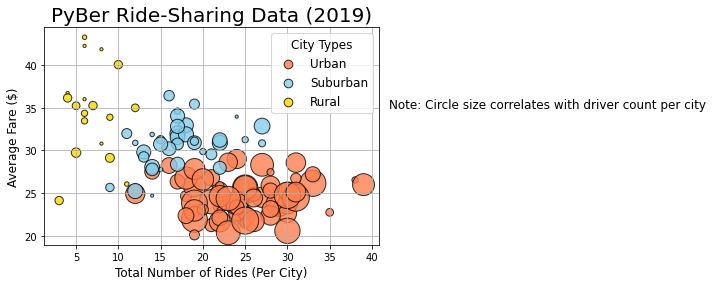

In [99]:
# PUTTING ALL THREE IN THE SAME CELL PUTS ALL THREE ON THE SAME 
# GRAPH! :)

#build the scatter plot for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count,
            edgecolor = 'black',
            c = 'coral',
            linewidths = 1,
            alpha = 0.8,
            label = 'Urban'
            )

# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count,
            c="skyblue",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Suburban")

# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, # x axis
            rural_avg_fare, # y axis
            s=10*rural_driver_count, # increase size
            c="gold", # bubble color
            edgecolor="black", # outline color
            linewidths=1, # outline of bubble
            alpha=0.8, # transparency
            label="Rural") # legend


plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)

lgnd=plt.legend(fontsize = '12', # font size of legend
               mode = 'Expanded', # expands the legend horizontally to fit the area
               scatterpoints = 1, # add the number of scatter points to legend for marker to be 1
               loc = 'best', #location setting for best based on the plotting of data
               title = 'City Types') # adds a title to the legend
lgnd.legendHandles[0]._sizes = [75] # set each marker in the legend equal to 75-point font
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12) # increase font size of the legend to 12

# incorporate a text label about circle size
plt.text(42,
        35,
        'Note: Circle size correlates with driver count per city',
        fontsize='12')

# show plot
plt.show()